# Parte 1: Numpy

In [1]:
import numpy as np

#### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [2]:
bool_array = np.ones(1000,dtype='bool')
size_bytes = bool_array.nbytes
print(f"El tamaño de un array de 1000 elementos tipo bool es: {size_bytes} bytes")

El tamaño de un array de 1000 elementos tipo bool es: 1000 bytes


#### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [3]:
enteros_pares = np.arange(2,101,2)
enteros_pares_dec = enteros_pares[::-1]
print(f"{enteros_pares_dec[-10:] = :}")

enteros_pares_dec[-10:] = [20 18 16 14 12 10  8  6  4  2]


#### 3. Dado el array

$\begin{bmatrix}
2 & 4 & 5 & 6 \\
0 & 3 & 7 & 4\\
8 & 8 & 5 & 2\\
1 & 5 & 6 & 1
\end{bmatrix}$

**Seleccione con una instrucción el subarray de elementos**

$\begin{bmatrix}
0 & 3 & 4 & 7 
\end{bmatrix}$

In [4]:
ex3_array = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
ex3_1_array = ex3_array[1]
ex3_1_array

array([0, 3, 7, 4])

**Después, seleccione el subarray de elementos**

$\begin{bmatrix}
2 & 5\\ 
8 & 5 
\end{bmatrix}$

In [5]:
ex3_2_array = ex3_array[::2,::2]
ex3_2_array

array([[2, 5],
       [8, 5]])

#### 4. Dados los arrays 
$a = [1, 4, 2, 7]$

$b = [1, 3, 2, 9]$

**obtenga la media aritmética de la diferencia (a-b)**

In [6]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
print(f"{a = :}\n{b = :}\n{(a-b) = :}\n{(a-b).mean() = :}")

a = [1 4 2 7]
b = [1 3 2 9]
(a-b) = [ 0  1  0 -2]
(a-b).mean() = -0.25


####  5. Tengo valores de cordenadas (x, y) en las columnas del array
$\begin{bmatrix}
1.33 & 4.5\\
30.0 & 10.7\\
70.2 & 0.5
\end{bmatrix}$

In [7]:
ex5_array = np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])
ex5_array

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ]])

**Agregue a este array las coordenadas (37.1, -3.6).**

In [8]:
ex5_array_add = np.append(ex5_array,[[37.1,-3.6]],axis=0)
ex5_array_add

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

**Muestre en pantalla las dimensiones del nuevo array.**

In [9]:
dim = ex5_array_add.shape
print(f"El array tiene {dim[0]} filas y {dim[1]} columnas.")

El array tiene 4 filas y 2 columnas.


#### 6. Copie el array del ejercicio anterior. Traspóngalo.).

In [10]:
ex6_array = ex5_array_add.copy()
ex6_array

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

In [11]:
ex6_array_trans = ex6_array.T
ex6_array_trans

array([[ 1.33, 30.  , 70.2 , 37.1 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ]])

**Agregue ahora dos nuevos pares de coordenadas: 
(10.8, 3.0) y (35.8, 12.0).**

In [12]:
np.concatenate((ex6_array_trans,np.array([[10.8,3.0],[35.8,12.0]]).T),axis=1)

array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

# Parte 2: Exploración y Minería de Datos

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv('NucleosPoblacion.csv')
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [15]:
dataset.shape

(852, 10)

In [18]:
# se verifica si hay duplicados
dataset.duplicated().sum()

0

#### 1. ¿Cuántos Municipios tienen más de 100,000 habitantes?.

In [19]:
cant_mun = (dataset.Poblacion > 1e5).sum()
print(f"{cant_mun} municipios tienen más de 100,000 habitantes")

62 municipios tienen más de 100,000 habitantes


####  Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda

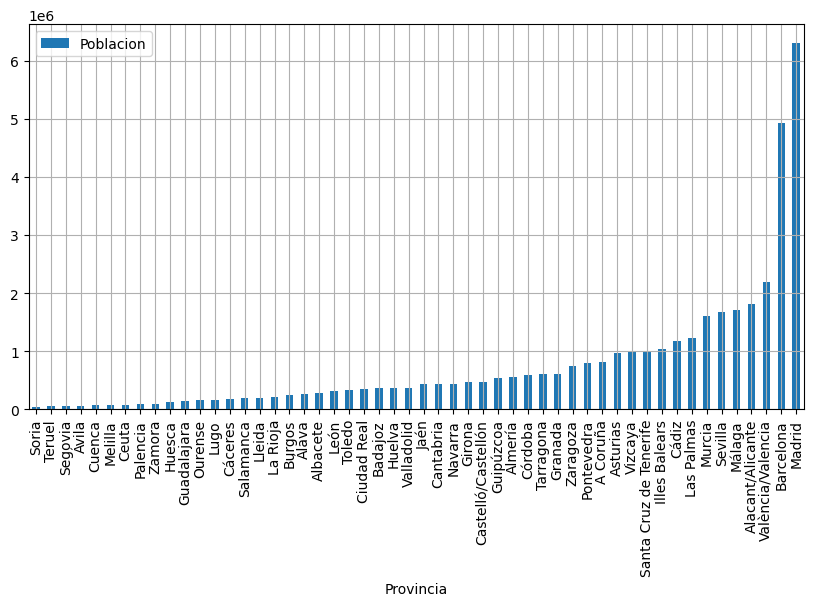

In [20]:
pob_prov = dataset.groupby('Provincia')[['Poblacion']].sum().sort_values(by='Poblacion')
pob_prov.plot(kind='bar', figsize=(10,5))
plt.grid()

**a. ¿Cuál es la segunda ciudad más poblada?**

Se observa en el gráfico que la segunda ciudad más poblada es Barcelona.

**b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?**

Se observa en el gráfico que ocupa el puesto 17.

Se comprueba ordenando los datos de mayor a menor y buscando la provincia de Granada en el dataframe.

In [21]:
pob_prov_sort = (pob_prov
                 .sort_values(by='Poblacion', ascending=False)
                 .reset_index()
                )
pob_prov_sort.index += 1
pob_prov_sort[pob_prov_sort.Provincia == 'Granada']

,Provincia,Poblacion
17,Granada,604357.0


#### 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [22]:
extremadura = dataset[dataset.Provincia.isin(['Cáceres','Badajoz'])]
print(f"Extremadura tiene {(extremadura.Poblacion > 5e3).sum()} municipios con más de 5,000 habitantes")

Extremadura tiene 14 municipios con más de 5,000 habitantes


#### 4. ¿Cuál es el municipio situado más al Norte?

In [23]:
northest_mun = dataset[dataset.Y == max(dataset.Y)]
print(f"El municipio situado más al norte es {northest_mun.Municipio.values[0]}")
print(f"Se encuentra en la Provincia de {northest_mun.Provincia.values[0]}")
print(f"Cuenta con una población de {int(northest_mun.Poblacion.sum()):,} habiantes")

El municipio situado más al norte es Viveiro
Se encuentra en la Provincia de Lugo
Cuenta con una población de 16,211 habiantes


#### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [24]:
mun_granada = dataset[dataset.Provincia == 'Granada'][['Municipio','Poblacion']]
media_pob = mun_granada.Poblacion.mean()
mediana_pob = mun_granada.Poblacion.median()
std_pob = mun_granada.Poblacion.std()
max_pob = mun_granada.Poblacion.max()
min_pob = mun_granada.Poblacion.min()
print(f"Datos de la población de Granda\n{50*'-'}")
print(f"{media_pob = :,.2f}\n{mediana_pob = :,.2f}\n{std_pob = :,.2f}\n{max_pob = :,.2f}\n{min_pob = :,.2f}")

Datos de la población de Granda
--------------------------------------------------
media_pob = 30,217.85
mediana_pob = 17,526.00
std_pob = 50,355.49
max_pob = 239,154.00
min_pob = 10,386.00


#### 6. Realice un histograma con la población de los Municipios para cada una de las provincias

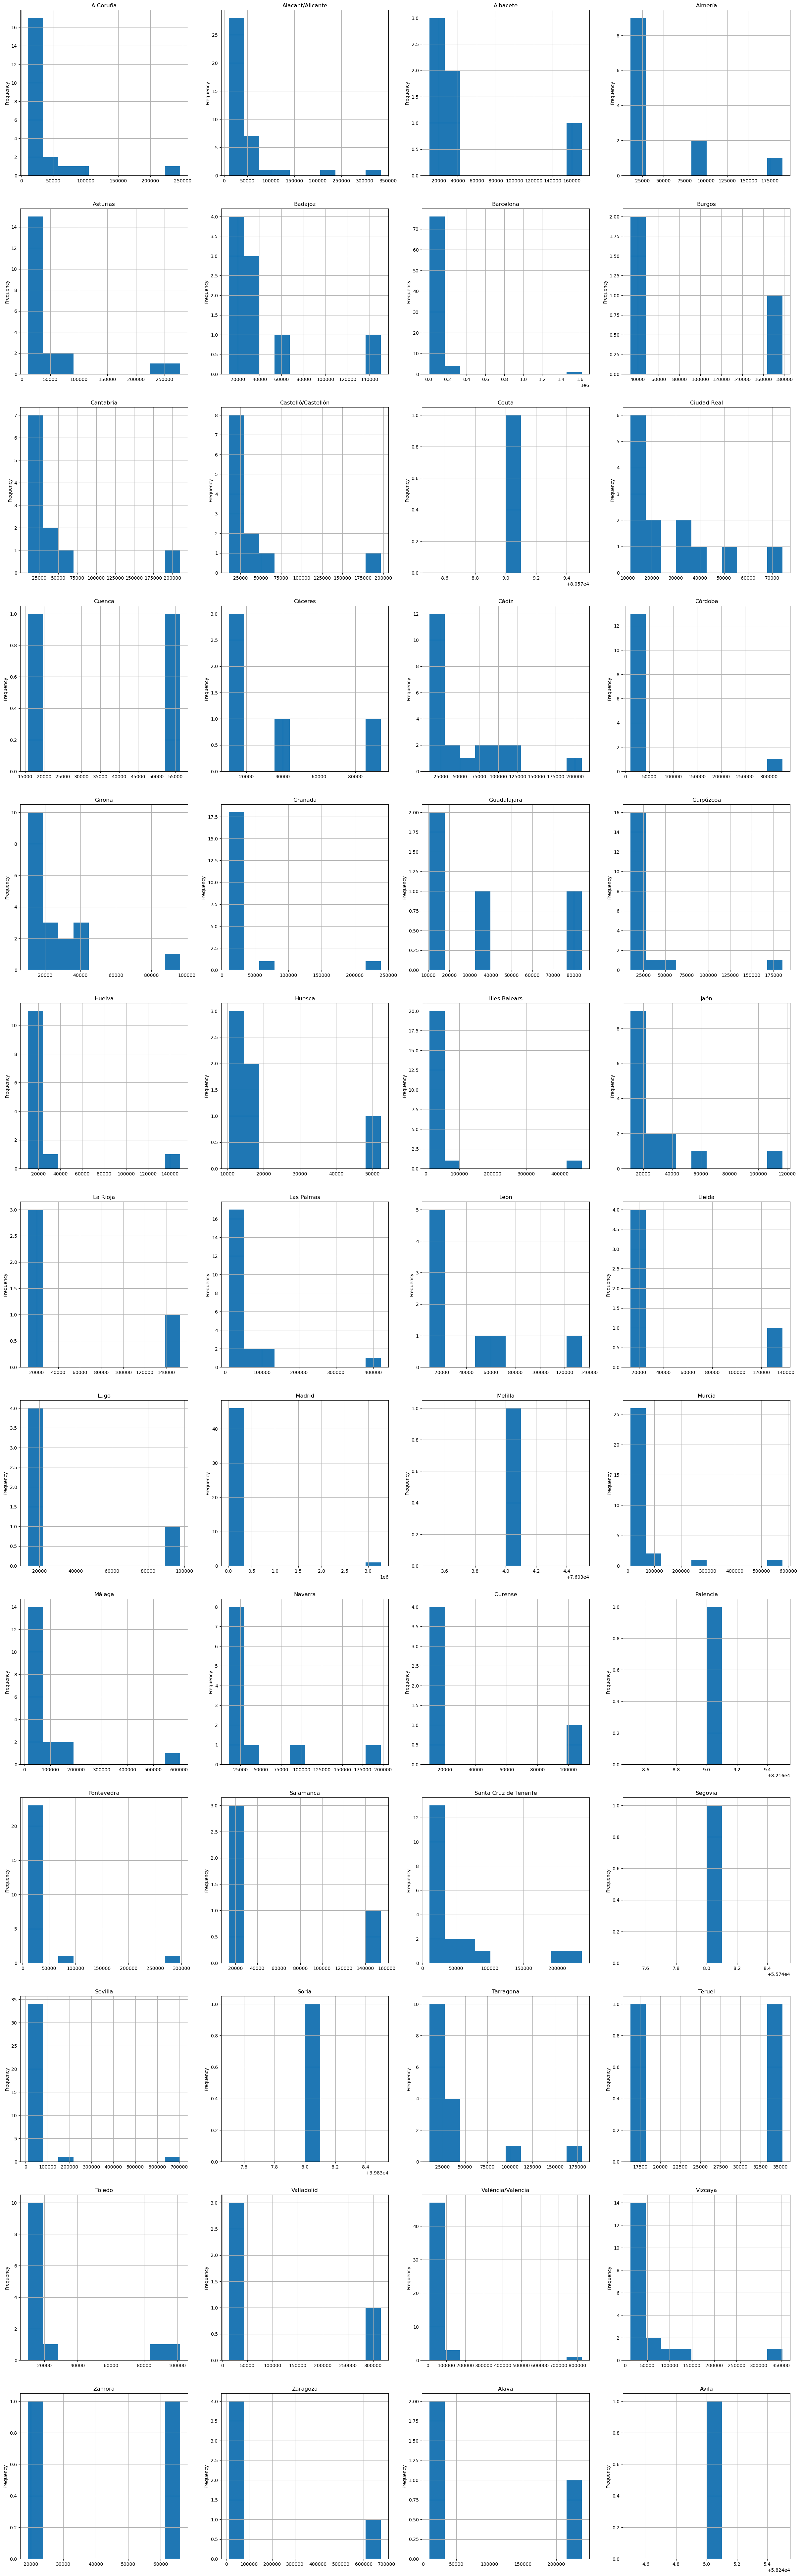

In [69]:
provincias = dataset.groupby(['Provincia','Municipio'])[['Poblacion']].sum().reset_index()
fig, ax =  plt.subplots(13,4, figsize=(30,100))
for i, prov in enumerate(provincias.Provincia.unique()):
    df = provincias[provincias.Provincia == prov]
    graf =df.Poblacion.plot(kind='hist', ax=ax[i//4,i%4],title=prov,grid=True)
plt.show()

#### 7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [107]:
municipios = pd.DataFrame(dataset.Municipio.unique(), columns=['Municipio']).sample(50, replace=False)
print(f"Los municipios seleccionados son: {municipios.Municipio.values}")

Los municipios seleccionados son: ['Ceuta' 'Medina-Sidonia' 'Haro' 'Laudio/Llodio' 'Navalmoral de la Mata'
 'Córdoba' 'Yaiza' 'Lucena' 'La Carlota' 'Jerez de la Frontera' 'Amposta'
 'San Fernando de Henares' 'Palencia' 'Castalla' 'Santander'
 'Torrejón de Ardoz' 'Calvià' 'Ponferrada' 'Pinto' 'Astorga' 'Mogán'
 'Lebrija' 'Salamanca' 'Utebo' 'Soria' 'Medina del Campo' 'Gernika-Lumo'
 'Manresa' 'Roquetas de Mar' 'Mancha Real' 'Tineo' 'Alcázar de San Juan'
 'Cantillana' 'Fuente Palmera' "Sant Sadurní d'Anoia" 'Cartagena' 'Abrera'
 'Adra' 'Castellbisbal' 'Las Cabezas de San Juan' 'Maó' 'San Bartolomé'
 'Vilanova del Camí' 'Alzira' 'Villajoyosa/La Vila Joiosa' 'Badalona'
 'Puçol' 'Oropesa del Mar/Orpesa' 'Zarautz' 'Loja']


In [108]:
df_mun = dataset[dataset.Municipio.isin(municipios.Municipio)]
pob_mean = df_mun.Poblacion.mean()
pob_std = df_mun.Poblacion.std()
print(f"La población media de los municipios seleccionados es: {pob_mean:,.2f}")
print(f"La desviación estándar de la población de los municipios seleccionados es: {pob_std:,.2f}")

La población media de los municipios seleccionados es: 47,492.14
La desviación estándar de la población de los municipios seleccionados es: 65,037.85


#### 8. Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero

In [171]:
# algunos municipios están repetidos, se toma la media de las coordenadas
coord_mun = dataset.groupby('Municipio')[['X','Y']].mean()
print(f"Cantidad total de municipios: {coord_mun.shape[0]}")

# Se extraen las coordenadas del municipio de Madrid
coord_madrid = coord_mun.loc['Madrid'].values
coord_mun.drop('Madrid', inplace=True)
print(f"Coordenadas de Madrid (municipio): {coord_madrid}")

print(f"Cantidad de municipios sin Madrid: {coord_mun.shape[0]}")

# Cálculo de la distancia para cada municipio
coord_mun[['dX','dY']] = coord_mun-coord_madrid
coord_mun['dist'] = (coord_mun.dX**2 + coord_mun.dY**2)**(1/2)

# Determinación de distancia mínima y máxima
farthest_mun = coord_mun[coord_mun.dist == coord_mun.dist.max()].index[0]
closest_mun = coord_mun[coord_mun.dist == coord_mun.dist.min()].index[0]
print(f"El municipio más lejano de Madrid es: {farthest_mun}")
print(f"El municipio más cercano de Madrid es: {closest_mun}")

Cantidad total de municipios: 751
Coordenadas de Madrid (municipio): [-3.70379708 40.41663   ]
Cantidad de municipios sin Madrid: 750


In [ ]:
!git add .

In [ ]:
!git commit -m "Parte II"

In [ ]:
!git push 